In [76]:

import pandas as pd
import numpy as np
import warnings; warnings.filterwarnings(action='once')

In [77]:
def ma_mean(df,w = 60,m = 1):
    df1 = pd.DataFrame(columns = df.columns,index = df.index)
    df1 = df.rolling(window=w,min_periods=m).mean()
    return df1



def ma_skew(df,w = 60):
    df1 = pd.DataFrame(columns = df.columns,index = df.index)
    df1 = df.rolling(window=w,min_periods=1).skew()
    return df1

In [78]:
buy_amt = pd.read_parquet('./buy_amt.pq')
sell_amt = pd.read_parquet('./sell_amt.pq')
up = pd.read_parquet('./up.pq')
ret = pd.read_parquet('./ret.pq')
amplitude = pd.read_parquet('./amplitude.pq')
clse = pd.read_parquet('./clse.pq')

/home/liyl/.local/lib/python3.8/site-packages/pandas/core/window/rolling.py:607: RuntimeWarning: All-NaN slice encountered
  return func(x, start, end, min_periods, *numba_args)


0.03788765213809932


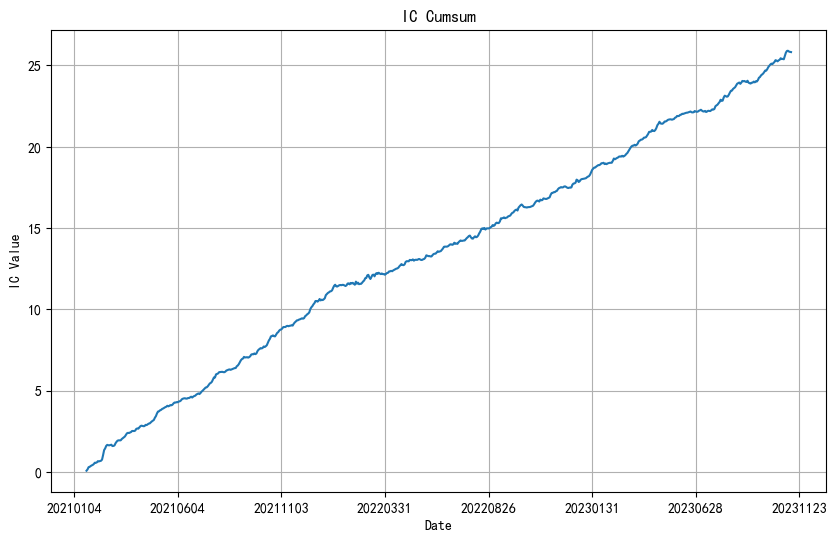

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

class FactorAnalysis:
    def __init__(self, label_matrix):
        """
        初始化因子分析类
        :param factor_matrix: 因子矩阵 (DataFrame)
        """
        
        self.label_matrix = label_matrix

    def input_factor(self ,factor_matrix):
        self.factor_matrix = factor_matrix
    def compute_ic(self):
        """
        计算因子的IC值（信息比率）
        :return: 因子的IC值
        """
        ic_values = self.factor_matrix.corrwith(self.label_matrix, axis=1)
        ic_mean = ic_values.mean()
        return ic_mean
    
    def plot_ic_time_series(self):
        """
        绘制IC随时间变化的图
        """
        ic_values = self.factor_matrix.corrwith(self.label_matrix, axis=1)
        plt.figure(figsize=(10, 6))
        ic_values.index = ic_values.index.astype(str)
        ic_values.cumsum().plot()
        plt.title("IC Cumsum")
        plt.xlabel("Date")
        plt.ylabel("IC Value")
        plt.grid(True)
        plt.show()



return10 = clse / clse.rolling(window = 10).mean().shift(1)
return10_skew = ma_skew(return10,10)
factor_analysis = FactorAnalysis( ret)
factor_analysis.input_factor(-return10_skew)
print(factor_analysis.compute_ic()) 


factor_analysis.plot_ic_time_series() 


0.018339704960322317


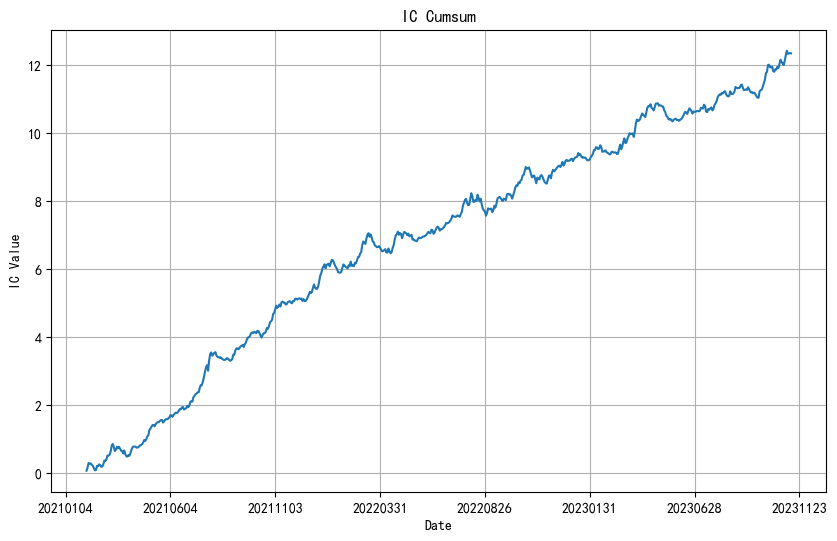

In [80]:
test = clse.pct_change(1)
test1 = test.rolling(window=20).corr(-amplitude)
factor_analysis.input_factor(test1)
print(factor_analysis.compute_ic())  # 计算IC值
factor_analysis.plot_ic_time_series()  # 绘制IC随时间变化的图

0.01785845683136896


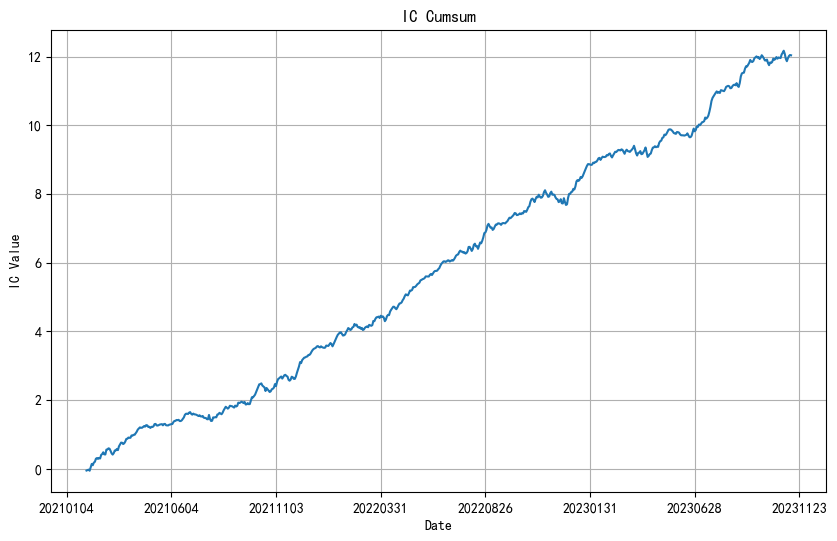

In [81]:
buy_amt_up= (buy_amt - ma_mean(buy_amt,10)) * up
sell_amt_up= (sell_amt - ma_mean(sell_amt,10)) * up

test = buy_amt_up.rolling(window=20).corr(sell_amt_up)
factor_analysis.input_factor(test.rank(pct = True))
print(factor_analysis.compute_ic()) 
factor_analysis.plot_ic_time_series() 